In [1]:
import sys
print(sys.executable)

/opt/conda/bin/python


In [2]:
import pandas as pd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


import seaborn as sns
sns.set(style="darkgrid")

from collections import Counter

In [3]:
data=pd.read_csv('./vgsales.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.dropna(how="any",inplace = True)


In [6]:
data.Year = data.Year.astype(int)

<b> for this part of the project, we focus on the time-series evaluation of the data, in particular
    changes in revenue of the different platforms. To do so, we would have to clean the data differently,
    using years as index columns and global sales of platforms as columns. We extract and analyze the 
    data from 2007 to 2017.
     </b>

In [14]:

first_filter=data.Year>2007
second_filter=data.Year<2017
new_data=data[first_filter&second_filter]



In [15]:
new_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [11]:
platform = new_data['Platform'].unique()
platform

array(['Wii', 'X360', 'PS3', 'DS', '3DS', 'PS4', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV', 'XB', 'DC'], dtype=object)

<b> we see that XB and DC do not generate revenue hence we drop these platforms and aggregate
store the global sales (2008-2016) into a list for each platforms in the order of the year </b>

In [25]:
# year, plat1_glob_sales, plat2_glob_sales ....

year = [2008,2009,2010,2011,2012,2013,2014,2015,2016]

wii_sales = []


X360_sales = []

PS3_sales = []

DS_sales = []

DS3_sales = []

PS4_sales = []

PC_sales = []


XOne_sales = []


WiiU_sales = []


PSP_sales = []



PS2_sales = []

PSV_sales = []







for num in year:
  
        wii_sales.append(sum(new_data.loc[new_data['Platform'] =='Wii'].loc[new_data['Year']==num].Global_Sales))
        X360_sales.append(sum(new_data.loc[new_data['Platform'] =='X360'].loc[new_data['Year']==num].Global_Sales))
        PS3_sales.append(sum(new_data.loc[new_data['Platform'] =='PS3'].loc[new_data['Year']==num].Global_Sales))
        DS_sales.append(sum(new_data.loc[new_data['Platform'] =='DS'].loc[new_data['Year']==num].Global_Sales))
        DS3_sales.append(sum(new_data.loc[new_data['Platform'] =='3DS'].loc[new_data['Year']==num].Global_Sales))
        PS4_sales.append(sum(new_data.loc[new_data['Platform'] =='PS4'].loc[new_data['Year']==num].Global_Sales))
        PC_sales.append(sum(new_data.loc[new_data['Platform'] =='PC'].loc[new_data['Year']==num].Global_Sales))
        XOne_sales.append(sum(new_data.loc[new_data['Platform'] =='XOne'].loc[new_data['Year']==num].Global_Sales))
        WiiU_sales.append(sum(new_data.loc[new_data['Platform'] =='WiiU'].loc[new_data['Year']==num].Global_Sales))
        PSP_sales.append(sum(new_data.loc[new_data['Platform'] =='PSP'].loc[new_data['Year']==num].Global_Sales))
        PSV_sales.append(sum(new_data.loc[new_data['Platform'] =='PSV'].loc[new_data['Year']==num].Global_Sales))
        
        

<b> we create a dataframe called data_plat_year that consists of yearly global sales data of each of the platform
 from 2008 to 2016 </b>

In [26]:
data_plat_year = pd.DataFrame()
data_plat_year['Year'] = year
data_plat_year['wii_sales'] = wii_sales
data_plat_year['X360_sales'] = X360_sales
data_plat_year['PS3_sales'] = PS3_sales
data_plat_year['DS_sales'] = DS_sales
data_plat_year['DS3_sales'] = DS3_sales
data_plat_year['PS4_sales'] = PS4_sales
data_plat_year['PC_sales'] = PC_sales
data_plat_year['XOne_sales'] = XOne_sales
data_plat_year['WiiU_sales'] = WiiU_sales
data_plat_year['PSP_sales'] = PSP_sales
data_plat_year['PSV_sales'] = PSV_sales


<b> we create another DataFrame called data_global_year so to plot general trend of sales volume of 
games sold in terms of millions from 2008 to 2016. Global sales volume peaks at 2008 and continues
to be on a decreasing trend </b>

In [18]:
data_global_year = new_data[['Global_Sales','Year']]

In [ ]:
#data_global_year.loc[data_global_year['Year']==2013].Global_Sales

In [19]:

total_sales = []
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2008].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2009].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2010].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2011].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2012].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2013].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2014].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2015].Global_Sales) )
total_sales.append( sum(data_global_year.loc[data_global_year['Year']==2016].Global_Sales) )

data_global_year = pd.DataFrame()

data_global_year['Year'] = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
data_global_year['Global_Sales'] = total_sales

<b> from our original dataset new_data which consists of sales from 2008-2016, seaborn catplot allows us
to see the breakdown of global sales of each year based on the platforms and the average sales of each platform.
We see that even though there's a drop in global sales since 2008, many platform average sales were on a rising
trend from 2011 to 2013. Based on the data we currently have, we can conclude that this happens because of a 
decrease in the number of games publish to produce higher quality games that can attract the shrinking consumer
base</b>

<b> the decrease in global sales of platform games is consistent with the data published by Newzoo which
shows the growing market in smartphone games. We are unable to get data on the revenue generated by publishers
because many games are not only sold but have extended packages or in-game items that could generate revenue </b>

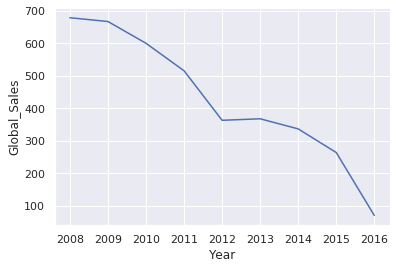

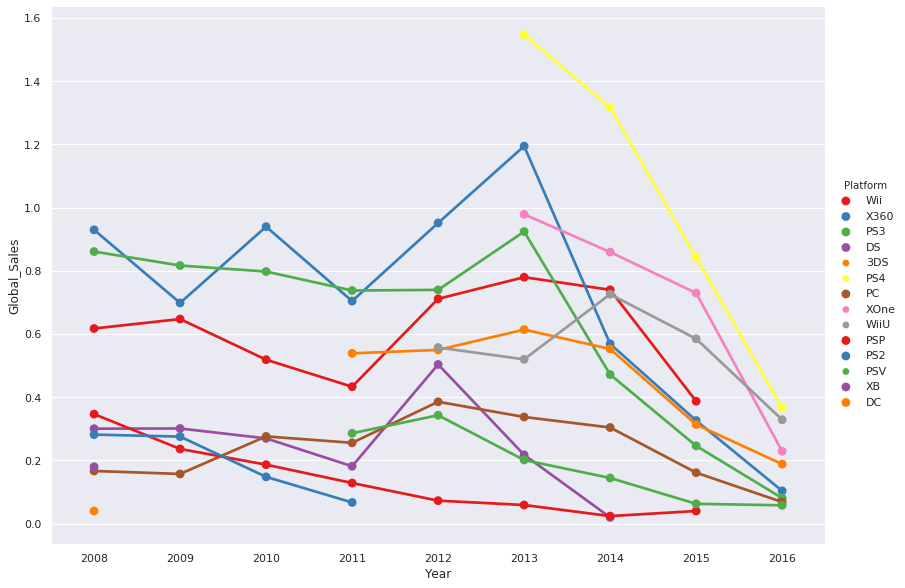

In [20]:
sns.lineplot(x="Year",y="Global_Sales",
            data=data_global_year,
            hue = None,
            palette='Set1',
            ci = None,
            
            )
sns.catplot(x="Year",y="Global_Sales",kind="point",
            data=new_data,
            hue = "Platform",
            palette='Set1',
            ci = None,
            edgecolor=None,
            height=8.27, 
            aspect=11.7/8.27)

plt.show()

<b>The graph below shows another perspective of the sales of games based on the various platforms where each value of
    the platform is sales overaged over the number of games based on the platform.</b>

<b> Using average
    is a appropriate way to see the popularity of a particular platform at a particular year because
    we want to know the popularity of a platform in general and do not need to be concerned of which
    game is in the 50th percentile of the platform in terms of sales generation</b>

<Figure size 1080x720 with 0 Axes>

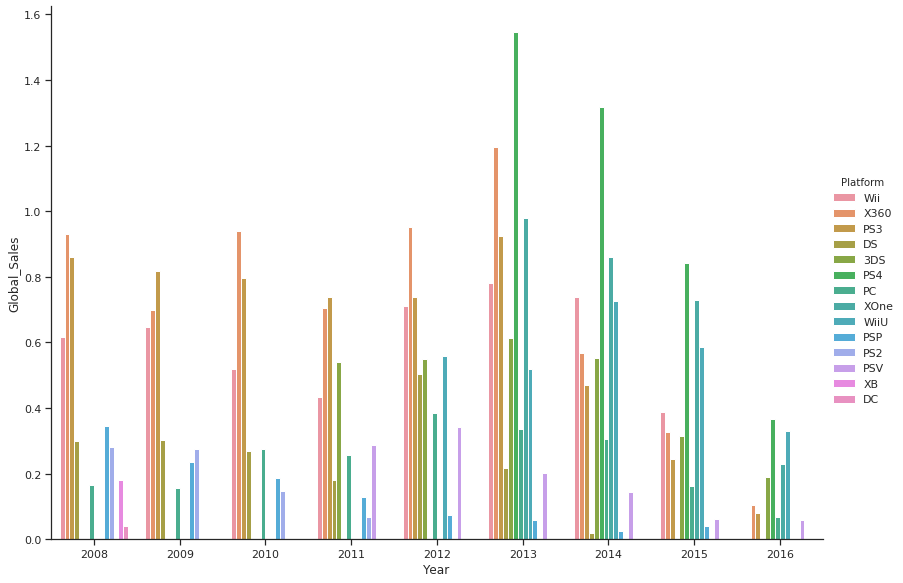

In [31]:
# bar provides mean
plt.figure(figsize=(15,10))
sns.catplot(x="Year",y="Global_Sales",kind="bar",
            hue="Platform",
            data=new_data,
            edgecolor=None,
            height=8.27, aspect=11.7/8.27,ci=None)
plt.show()

In [36]:
platforms

,wii_sales,X360_sales,PS3_sales,DS_sales,DS3_sales,PS4_sales,PC_sales,XOne_sales,WiiU_sales,PSP_sales,PSV_sales
Year,,,,,,,,,,,
2008,174.16,135.76,119.69,147.89,0.00,0.00,12.67,0.00,0.00,34.68,0.00
2009,210.44,120.85,132.34,121.99,0.00,0.00,17.16,0.00,0.00,38.07,0.00
2010,131.80,171.05,144.42,87.98,0.00,0.00,24.30,0.00,0.00,35.11,0.00
2011,62.41,145.12,159.37,27.80,62.53,0.00,35.06,0.00,0.00,17.89,5.15
2012,22.77,100.88,109.49,11.59,51.14,0.00,23.53,0.00,17.84,7.72,18.53
2013,9.36,89.61,117.39,1.96,55.88,24.76,12.83,18.60,21.84,3.19,12.69
2014,4.44,36.41,50.96,0.02,43.13,98.76,13.39,52.43,22.51,0.24,14.74
2015,1.55,13.05,18.22,0.00,26.99,115.30,8.07,57.66,16.38,0.12,7.10
2016,0.00,0.83,2.59,0.00,6.60,39.25,2.60,12.37,3.29,0.00,3.37


In [28]:
platforms = pd.DataFrame(data_plat_year.iloc[:,0:12])

In [29]:
platforms.set_index(['Year'],inplace=True)

<b> below is a regression plot that finds the correlation between the sales volume of the different platforms.
The significant takeaway of these plots is to uncover the magnitude of changes of each platform's sales volume
and how the changes of sales volume of each platform is reflected on the regression line. 
</b>

<b> thus each datapoint is the pairwise sales volume of 2 platforms at a particular year and the regression line
represents how similar their directions and magnitudes are </b>

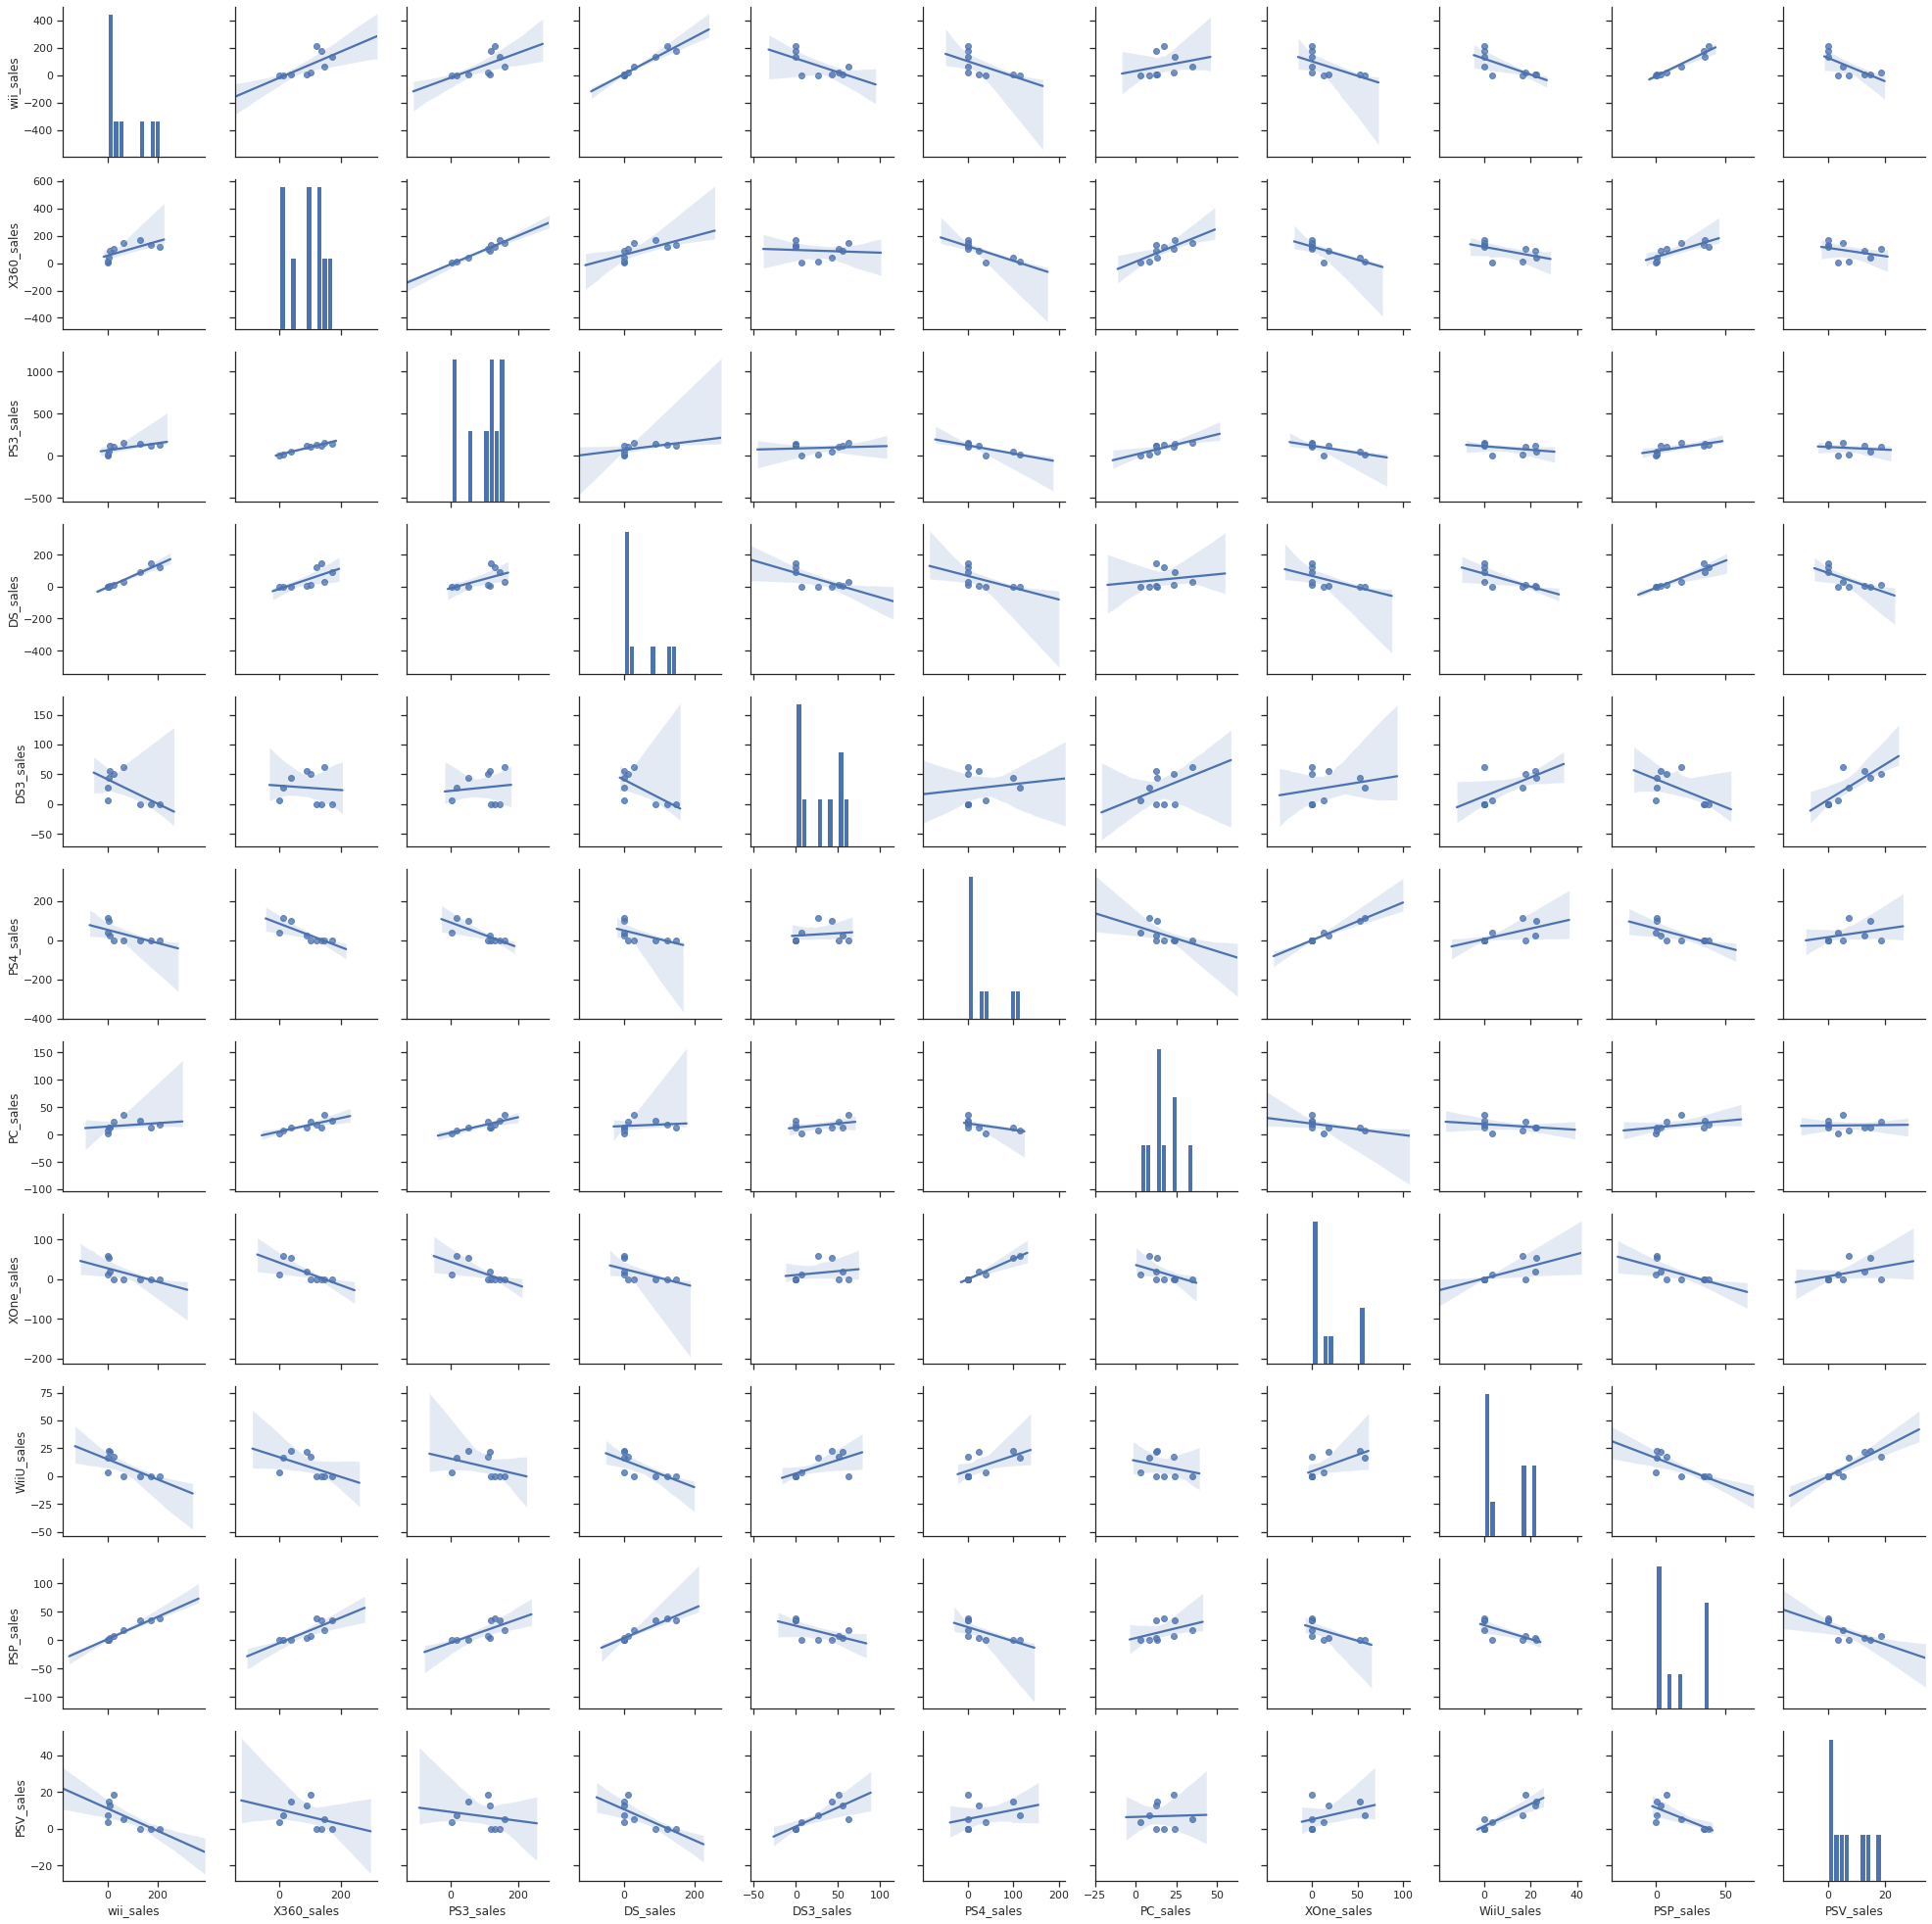

In [34]:
# top plaforms from 2008-2016
sns.set(style="ticks", color_codes=True)

pplot = sns.pairplot(platforms,vars=['wii_sales','X360_sales','PS3_sales','DS_sales','DS3_sales','PS4_sales',
                            'PC_sales','XOne_sales','WiiU_sales','PSP_sales',
                                    'PSV_sales'], kind="reg")

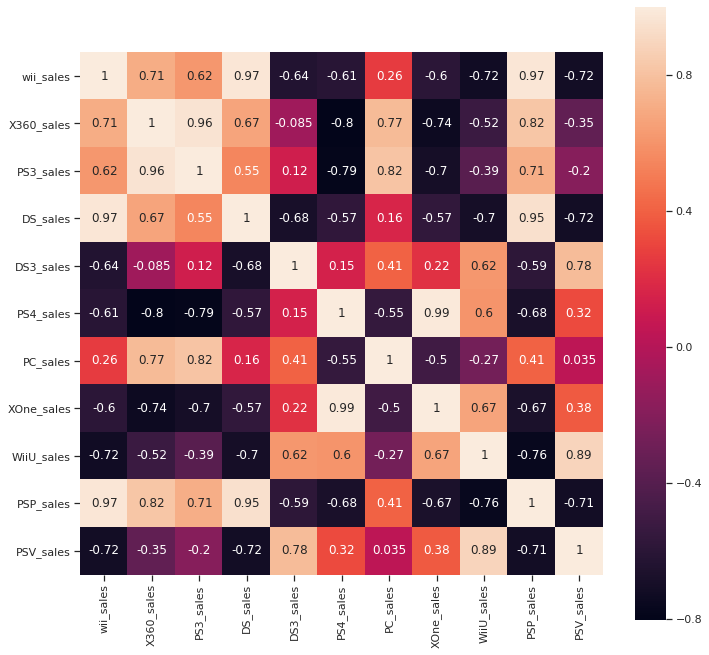

In [35]:
a4_dims=(11.7,11.27)
fig,ax = plt.subplots(figsize=a4_dims)
#plt.axes.Axes.set_ylim(bottom=0,top=10)
sns.heatmap(platforms.corr(),square=True,yticklabels=True,ax=ax,annot=True)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

plt.show()

<b> This correlation matrix further asserts the interpretation of the regression plot above. where several results
can be found. We see that although PS4 and XOne are competitors, they share a very similar sales trend from their
release since 2013, but with PS4 capturing a bigger market share after the year of their debut.
</b>

<b> we also can observe the obvious fact that once a newer generation of platform comes out, there is a negative
correlation between the newer generation and its predecessor (PS4 vs PS3, 3DS vs DS, PSP vs PSV) with the 
exception of WiiU and 3DS, which might be due to the different genres of games played on the platforms.
</b>

<b> The 3DS and WiiU proves to be more popular than the PSV consoles with the amount of game volumes sold in
the order. However they also experience a similar trend with a rebound in game sales on the 3rd year of their 
release. WiiU and PSV share similar popularity rate as oppose to 3DS which is much more popular </b>

<b> not much can be extrapolated from these findings about the symbiotic or competitive relationship between
handheld and console devices except that we have at least one handheld device (DS3) whose popular rivals
that of console competitors of the same generation (Xone and PS4)</b>

<b> The correlation of sales trend of PC with X360 and PS3 is fairly consistent and we can deduce that is so
    because many games are multi-platform between these 3 platforms and popular games tend to boost sales
    that are dependent on these platforms. Thus even though X360 and PS3 are competitors, the games published
    on either platforms do help sales in PC, even though the PC has a substantially smaller sales volume
    among the 3 platforms </b>